In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df=pd.read_csv('amazon_india_2017.csv')
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2017_00000001,17-01-2017,CUST_2016_00011375,PROD_000297,Vivo V7+ 16GB Black,Electronics,Smartphones,Vivo,25367.39,0.00,25367.39,1,25367.39,0.0,25367.39,Pune,Maharashtra,Tier1,Standard,NaN,COD,5,Standard,False,FALSE,NaN,NaN,Delivered,1,2017,1,0.23,True,4.6
1,TXN_2017_00000002,2017-01-28,CUST_2017_00014565,PROD_000193,Motorola Moto G4 32GB White,Electronics,Smartphones,Motorola,16997.28,9.98,15301.00,1,15301.00,0.0,15301.00,Chandigarh,Punjab,Tier2,Budget,26-35,COD,6,Standard,False,False,NaN,3.0,Returned,1,2017,1,0.16,True,3.5
2,TXN_2017_00000003,2017-01-30,CUST_2016_00011649,PROD_000073,Xiaomi Redmi 2 16GB White,Electronics,Smartphones,Xiaomi,47409.63,0.00,47409.63,1,47409.63,0.0,47409.63,Ludhiana,Punjab,Tier2,Standard,26-35,COD,7,Standard,False,False,NaN,3.5,Delivered,1,2017,1,0.23,True,4.2
3,TXN_2017_00000004,2017-01-04,CUST_2016_00003484,PROD_000047,Samsung Galaxy J7 64GB Black,Electronics,Smartphones,Samsung,"₹45,555.75",0.00,45555.75,1,45555.75,0.0,45555.75,Bangalore,Karnataka,Metro,Standard,36-45,COD,3,Standard,False,False,NaN,4.5,Delivered,1,2017,1,0.24,True,4.4
4,TXN_2017_00000005,2017-01-07,CUST_2015_00009936,PROD_000136,Samsung Galaxy S7 Edge 16GB Blue,Electronics,Smartphones,Samsung,100190.24,0.00,100190.24,1,100190.24,0.0,100190.24,Mumbai,Maharashtra,Metro,Premium,26-35,COD,4,Standard,False,False,NaN,5.0,Delivered,1,2017,1,0.16,True,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77380,TXN_2017_00035663_DUP,2017-07-31,CUST_2017_00008063,PROD_000158,OnePlus OnePlus 3 16GB White,Electronics,Smartphones,OnePlus,110926.16,0.00,110926.16,2,221852.32,0.0,221852.32,Delhi,Delhi,Metro,Standard,18-25,Debit Card,4,Standard,False,No,NaN,4.0,Delivered,7,2017,3,0.20,True,4.3
77381,TXN_2017_00064232_DUP,2017-11-02,CUST_2017_00004214,PROD_002000,LG OLED TV Premium,Electronics,TV & Entertainment,LG,254318.22,18.42,207464.64,1,207464.64,0.0,207464.64,Kolkata,West Bengal,Metro,Premium,18-25,Credit Card,3,Standard,False,True,Diwali Sale,4.0,Delivered,11,2017,4,21.84,True,4.0
77382,TXN_2017_00048534_DUP,2017-09-12,CUST_2017_00008851,PROD_000142,Samsung Galaxy Note 7 16GB White,Electronics,Smartphones,Samsung,129511.96,0.00,129511.96,1,129511.96,0.0,129511.96,Kochi,Kerala,Tier2,Premium,NaN,COD,1,Same Day,True,False,NaN,NaN,Delivered,9,2017,3,0.22,True,4.0
77383,TXN_2017_00036517_DUP,2017-07-06,CUST_2016_00017094,PROD_000155,OnePlus OnePlus 3 16GB Black,Electronics,Smartphones,OnePlus,49421.61,53.03,23211.76,1,23211.76,0.0,23211.76,Mumbai,Maharashtra,Metro,Budget,36-45,Debit Card,3,Standard,False,True,Back to School,5.0,Delivered,7,2017,3,0.23,True,3.3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77385 entries, 0 to 77384
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          77385 non-null  object 
 1   order_date              77385 non-null  object 
 2   customer_id             77385 non-null  object 
 3   product_id              77385 non-null  object 
 4   product_name            77385 non-null  object 
 5   category                77385 non-null  object 
 6   subcategory             77385 non-null  object 
 7   brand                   77385 non-null  object 
 8   original_price_inr      77385 non-null  object 
 9   discount_percent        77385 non-null  float64
 10  discounted_price_inr    77385 non-null  float64
 11  quantity                77385 non-null  int64  
 12  subtotal_inr            77385 non-null  float64
 13  delivery_charges        71196 non-null  float64
 14  final_amount_inr        77385 non-null

#Question 1
Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.


In [3]:
df['order_date']=df['order_date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['order_date']

,order_date
0,17-01-2017
1,2017-01-28
2,2017-01-30
3,2017-01-04
4,2017-01-07
...,...
77380,2017-07-31
77381,2017-11-02
77382,2017-09-12
77383,2017-07-06


In [4]:
df['order_date'].isnull().sum()

np.int64(0)

In [5]:
mask = df['order_date'].str.match(r'^\d{4}-\d{2}-\d{2}$')

df.loc[mask,'order_date']=pd.to_datetime(df.loc[mask, 'order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,17-01-2017
1,2017-01-28 00:00:00
2,2017-01-30 00:00:00
3,2017-01-04 00:00:00
4,2017-01-07 00:00:00
...,...
77380,2017-07-31 00:00:00
77381,2017-11-02 00:00:00
77382,2017-09-12 00:00:00
77383,2017-07-06 00:00:00


In [6]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,NaT
1,2017-01-28
2,2017-01-30
3,2017-01-04
4,2017-01-07
...,...
77380,2017-07-31
77381,2017-11-02
77382,2017-09-12
77383,2017-07-06


#Question 2
The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.


In [7]:
df['original_price_inr']=df['original_price_inr'].str.replace(r'[^\d.]','',regex=True)
df['original_price_inr']=df['original_price_inr'].astype('float')
df['original_price_inr']

,original_price_inr
0,25367.39
1,16997.28
2,47409.63
3,45555.75
4,100190.24
...,...
77380,110926.16
77381,254318.22
77382,129511.96
77383,49421.61


In [8]:
df['original_price_inr'].isnull().sum()

np.int64(0)

#Question 3
Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [9]:
df['customer_rating'].unique()

array([nan, '3.0', '3.5', '4.5', '5.0', '4.0', '4.5/5.0', '5.0 stars',
       '4.0/5.0', '4/5', '4.5 stars', '4.0 stars', '3.0 stars', '5/5',
       '3.5 stars', '4', '5.0/5.0', '3', '3/5', '5', '3.5/5.0', '3.0/5.0'],
      dtype=object)

In [10]:
df['customer_rating']=df['customer_rating'].str.replace(r'[\/ ].*','',case=False,regex=True).str.strip()

In [11]:
df['customer_rating'].isnull().sum()

np.int64(23592)

In [12]:
df['customer_rating']=df['customer_rating'].replace('',np.nan)

In [13]:
df['customer_rating']=df['customer_rating'].astype(float)

In [14]:
df['customer_rating']

,customer_rating
0,NaN
1,3.0
2,3.5
3,4.5
4,5.0
...,...
77380,4.0
77381,4.0
77382,NaN
77383,5.0


In [15]:
df['customer_rating'].isnull().sum()

np.int64(23592)

In [16]:
df['customer_rating'].mean()
# df['customer_rating'].median()
# df['customer_rating'].mode()

np.float64(4.316444518803562)

In [17]:
df['customer_rating']=df['customer_rating'].fillna(df['customer_rating'].mean())

In [18]:
df['customer_rating'].isnull().sum()

np.int64(0)

#Question 4
The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [19]:
df['customer_city'].unique()

array(['Pune', 'Chandigarh', 'Ludhiana', 'Bangalore', 'Mumbai', 'Kanpur',
       'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore', 'Ahmedabad',
       'Chennai', 'Kochi', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
       'Hyderabad', 'Lucknow', 'Varanasi', 'Bengaluru', 'Moradabad',
       'Jaipur', 'Surat', 'Coimbatore', 'kolkata', 'Vadodara', 'Meerut',
       'Aligarh', 'DELHI', 'chenai', 'Bareilly', 'Saharanpur', 'Mumbai ',
       'Allahabad', 'Bengalore', 'KOLKATA', 'Calcutta', 'Bombay',
       'BANGALORE', 'mumba', 'Madras', 'New Delhi', 'Chennai ',
       'Delhi NCR', 'CHENNAI', 'Kolkata ', 'Banglore', 'delhi', 'MUMBAI'],
      dtype=object)

In [20]:
!pip install fuzzywuzzy

In [21]:
from fuzzywuzzy import process  # pip install thefuzz

def clean_city_names(df, column):

    manual_mapping = {
        # Mumbai
        'bombay': 'Mumbai',
        'mumba': 'Mumbai',
        'mumbai ': 'Mumbai',
        'mumabi': 'Mumbai',

        # Bengaluru
        'bangalore': 'Bengaluru',
        'banglore': 'Bengaluru',
        'bengalore': 'Bengaluru',

        # Delhi
        'new delhi': 'Delhi',
        'delhi ncr': 'Delhi',
        'delhi ': 'Delhi',

        # Chennai
        'madras': 'Chennai',
        'chenai': 'Chennai',
        'chennai ': 'Chennai',

        # Kolkata
        'calcutta': 'Kolkata',
        'kolkata ': 'Kolkata',
        'kolkata': 'Kolkata',  # lowercase variant
        'kolkatta': 'Kolkata',
    }

    master_list= [
        'Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Kochi', 'Mumbai',
        'Kanpur', 'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore',
        'Ahmedabad', 'Chennai', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
        'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
        'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly', 'Saharanpur',
        'Allahabad'
    ]
    master_list_lower = [c.lower() for c in master_list]


    df[column] = df[column].astype(str).str.lower().str.strip()
    df[column] = df[column].replace({"nan": pd.NA})

    df[column] = df[column].replace(manual_mapping)

    def match_city(city):
        if pd.isna(city):
            return city
        best_match, score = process.extractOne(city, master_list_lower)
        return best_match if score > 85 else city

    df[column] = df[column].apply(match_city)


    df[column] = df[column].apply(lambda x: x.title() if pd.notna(x) else x)

    return df[column]


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [22]:
# Get unique city names
unique_cities = df['customer_city'].unique()

# Apply the cleaning function to unique city names
cleaned_unique_cities = [clean_city_names(pd.DataFrame({'city': [city]}), 'city').iloc[0] for city in unique_cities]

# Create a mapping dictionary
city_mapping = dict(zip(unique_cities, cleaned_unique_cities))

# Map the cleaned names back to the original column
df['customer_city'] = df['customer_city'].map(city_mapping)

display(df['customer_city'].unique())

array(['Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Mumbai', 'Kanpur',
       'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore', 'Ahmedabad',
       'Chennai', 'Kochi', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
       'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
       'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly',
       'Saharanpur', 'Allahabad'], dtype=object)

In [23]:
df['customer_city'].unique()

array(['Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Mumbai', 'Kanpur',
       'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore', 'Ahmedabad',
       'Chennai', 'Kochi', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
       'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
       'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly',
       'Saharanpur', 'Allahabad'], dtype=object)

#Question 5
Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.


In [24]:
df['is_prime_member'].unique()

array(['False', 'True', 'No', 'FALSE', '0', 'Yes', '1', 'TRUE'],
      dtype=object)

In [25]:
df['is_prime_eligible'].unique()

array(['True', 'False', 'No', 'Yes', 'TRUE', '0', '1', 'FALSE'],
      dtype=object)

In [26]:
df['is_festival_sale'].unique()

array(['FALSE', 'False', '0', 'True', 'Yes', 'No', 'TRUE', '1'],
      dtype=object)

In [27]:
import pandas as pd

def make_true_false(x):

    if pd.isna(x):
        return pd.NA

    x = str(x).strip().upper()

    if x in ['NAN', 'NONE', 'NULL', '']:
        return pd.NA

    if x in ['NO', 'FALSE', '0']:
        return False
    elif x in ['YES', 'TRUE', '1']:
        return True

    return pd.NA


In [28]:
df['is_festival_sale']=df['is_festival_sale'].apply(make_true_false)
df['is_prime_eligible']=df['is_prime_eligible'].apply(make_true_false)
df['is_prime_member']=df['is_prime_member'].apply(make_true_false)

In [29]:
print(df['is_festival_sale'].unique())
print(df['is_prime_eligible'].unique())
print(df['is_prime_member'].unique())

[False  True]
[ True False]
[False  True]


#Question 6
Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [30]:
df['category'].unique()

array(['Electronics', 'ELECTRONICS', 'Electronicss',
       'Electronics & Accessories', 'Electronic'], dtype=object)

In [31]:
mapping_cat = {
    'electronics': 'Electronics',
    'electronic': 'Electronics',
    # 'Electronics & Accessories': 'Electronics',
    'ELECTRONICS':'Electronics',
    'Electronic':'Electronics',
    'Electronicss':'Electronics'

}

In [32]:
df['category']=df['category'].replace(mapping_cat)

In [33]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories'], dtype=object)

#Question 7
The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [34]:
df['delivery_days'].unique()

array(['5', '6', '7', '3', '4', '2', '-1', 'Express', '1', 'Same Day',
       '1-2 days', '15', '0'], dtype=object)

In [35]:
df.loc[df['delivery_days'].str.contains(r'[1-2|same day]',case=False,na=False),'delivery_days'].sample(10)

,delivery_days
51306,1
6768,1
71465,1
76569,1
21040,1
47892,2
70220,1
8711,2
8057,1
66710,Same Day


In [36]:
df['delivery_days']=df['delivery_days'].str.replace('1-2','2',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Same Day','1',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Express','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('-','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('2 days','2',case=False)

In [37]:
df['delivery_days'] = df['delivery_days'].replace('', np.nan)
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
display(df['delivery_days'].unique())

array([ 5.,  6.,  7.,  3.,  4.,  2.,  1., nan, 15.,  0.])

In [38]:
df['delivery_days'].isnull().sum()

np.int64(159)

In [39]:
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].mean()).astype(int)

In [40]:
df['delivery_days'].isnull().sum()


np.int64(0)

In [41]:
df['delivery_days'].head()

,delivery_days
0,5
1,6
2,7
3,3
4,4


#Question 8
Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


In [42]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
86,TXN_2017_00000087,2017-01-12,CUST_2017_00009666,PROD_001927,Fitbit Tracker,Electronics,Smart Watch,Fitbit,23018.41,0.00,23018.41,1,23018.41,0.0,23018.41,Jaipur,Rajasthan,Tier1,Budget,NaN,Debit Card,2,Express,True,False,NaN,4.500000,Delivered,1,2017,1,0.05,True,4.0
645,TXN_2017_00000646,2017-01-22,CUST_2016_00005669,PROD_001704,Lenovo iPad 8GB RAM Silver,Electronics,Tablets,Lenovo,57192.20,47.29,30145.45,1,30145.45,0.0,30145.45,Hyderabad,Telangana,Metro,Standard,26-35,COD,1,Same Day,True,True,Republic Day Sale,4.000000,Delivered,1,2017,1,0.52,True,4.3
697,TXN_2017_00000698,2017-01-31,CUST_2017_00013422,PROD_000072,Xiaomi Redmi 2 64GB Black,Electronics,Smartphones,Xiaomi,22679.83,0.00,22679.83,1,22679.83,0.0,22679.83,Chennai,Tamil Nadu,Metro,Standard,36-45,COD,6,Standard,False,False,NaN,4.500000,Delivered,1,2017,1,0.19,True,3.3
983,TXN_2017_00000984,2017-01-19,CUST_2016_00001459,PROD_001683,Apple Mi Pad 8GB RAM Silver,Electronics,Tablets,Apple,54058.79,0.00,54058.79,1,54058.79,0.0,54058.79,Ludhiana,Punjab,Tier2,Standard,NaN,COD,1,Same Day,True,False,NaN,5.000000,Delivered,1,2017,1,0.40,True,4.5
1028,TXN_2017_00001029,2017-01-31,CUST_2017_00012104,PROD_000230,Apple iPhone X 16GB Black,Electronics,Smartphones,Apple,127000.03,0.00,127000.03,1,127000.03,0.0,127000.03,Delhi,Delhi,Metro,Premium,18-25,COD,3,Standard,False,False,NaN,4.500000,Delivered,1,2017,1,0.25,True,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77380,TXN_2017_00035663_DUP,2017-07-31,CUST_2017_00008063,PROD_000158,OnePlus OnePlus 3 16GB White,Electronics,Smartphones,OnePlus,110926.16,0.00,110926.16,2,221852.32,0.0,221852.32,Delhi,Delhi,Metro,Standard,18-25,Debit Card,4,Standard,False,False,NaN,4.000000,Delivered,7,2017,3,0.20,True,4.3
77381,TXN_2017_00064232_DUP,2017-11-02,CUST_2017_00004214,PROD_002000,LG OLED TV Premium,Electronics,TV & Entertainment,LG,254318.22,18.42,207464.64,1,207464.64,0.0,207464.64,Kolkata,West Bengal,Metro,Premium,18-25,Credit Card,3,Standard,False,True,Diwali Sale,4.000000,Delivered,11,2017,4,21.84,True,4.0
77382,TXN_2017_00048534_DUP,2017-09-12,CUST_2017_00008851,PROD_000142,Samsung Galaxy Note 7 16GB White,Electronics,Smartphones,Samsung,129511.96,0.00,129511.96,1,129511.96,0.0,129511.96,Kochi,Kerala,Tier2,Premium,NaN,COD,1,Same Day,True,False,NaN,4.316445,Delivered,9,2017,3,0.22,True,4.0
77383,TXN_2017_00036517_DUP,2017-07-06,CUST_2016_00017094,PROD_000155,OnePlus OnePlus 3 16GB Black,Electronics,Smartphones,OnePlus,49421.61,53.03,23211.76,1,23211.76,0.0,23211.76,Mumbai,Maharashtra,Metro,Budget,36-45,Debit Card,3,Standard,False,True,Back to School,5.000000,Delivered,7,2017,3,0.23,True,3.3


In [43]:
df=df.drop_duplicates(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'],keep='first')

In [44]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


#Question 9
The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


In [45]:
df.loc[:,['product_name','original_price_inr']]

,product_name,original_price_inr
0,Vivo V7+ 16GB Black,25367.39
1,Motorola Moto G4 32GB White,16997.28
2,Xiaomi Redmi 2 16GB White,47409.63
3,Samsung Galaxy J7 64GB Black,45555.75
4,Samsung Galaxy S7 Edge 16GB Blue,100190.24
...,...,...
76995,OnePlus OnePlus 2 32GB Black,111191.38
76996,Samsung Galaxy Note 7 32GB Blue,78557.32
76997,OnePlus OnePlus X 32GB Black,61940.98
76998,Samsung Galaxy S6 Edge 64GB Black,97995.62


In [46]:
df['original_price_inr']

,original_price_inr
0,25367.39
1,16997.28
2,47409.63
3,45555.75
4,100190.24
...,...
76995,111191.38
76996,78557.32
76997,61940.98
76998,97995.62


<Axes: >

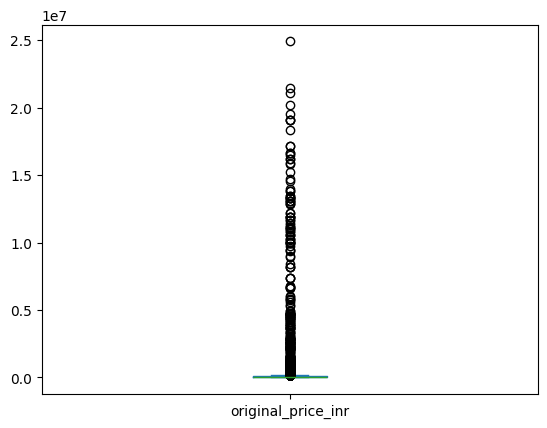

In [47]:
df['original_price_inr'].plot(kind='box')

In [48]:
df['original_price_inr'].describe()

,original_price_inr
count,7.700000e+04
mean,8.812599e+04
std,4.479155e+05
min,2.473000e+03
25%,2.916301e+04
50%,4.938018e+04
75%,1.001192e+05
max,2.491542e+07


In [49]:
Q1=df['original_price_inr'].quantile(0.25)
Q3=df['original_price_inr'].quantile(0.75)
Q3,Q1

(np.float64(100119.21), np.float64(29163.01))

In [50]:
IQR=Q3-Q1
IQR

np.float64(70956.20000000001)

In [51]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [52]:
lower_limit,upper_limit

(np.float64(-77271.29000000002), np.float64(206553.51))

In [53]:
df[((df['original_price_inr'] < lower_limit) | (df['original_price_inr'] > upper_limit))]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
122,TXN_2017_00000123,2017-01-01,CUST_2015_00000535,PROD_000226,Apple iPhone 8 Plus 64GB White,Electronics,Smartphones,Apple,209264.14,7.86,192825.69,1,192825.69,0.0,192825.69,Mumbai,Maharashtra,Metro,Premium,26-35,Credit Card,3,Standard,False,False,NaN,4.316445,Delivered,1,2017,1,0.17,True,3.2
137,TXN_2017_00000138,2017-01-20,CUST_2017_00025737,PROD_000229,Apple iPhone 8 Plus 64GB Blue,Electronics,Smartphones,Apple,208770.34,47.68,109234.55,1,109234.55,0.0,109234.55,Kanpur,Uttar Pradesh,Tier1,Premium,NaN,Debit Card,3,Standard,False,True,Republic Day Sale,5.000000,Delivered,1,2017,1,0.20,True,4.2
163,TXN_2017_00000164,2017-01-06,CUST_2016_00017428,PROD_000017,Apple iPhone 5s 16GB Black,Electronics,Smartphones,Apple,213733.45,12.07,187942.73,2,375885.45,0.0,375885.45,Mumbai,Maharashtra,Metro,Premium,18-25,COD,4,Standard,False,False,NaN,4.000000,Delivered,1,2017,1,0.17,True,3.2
207,TXN_2017_00000208,2017-01-28,CUST_2015_00005702,PROD_000035,Samsung Galaxy S6 Edge 32GB Blue,Electronics,Smartphones,Samsung,1321318.90,0.00,132131.89,1,132131.89,0.0,132131.89,Delhi,Delhi,Metro,Standard,26-35,COD,4,Standard,False,False,NaN,4.500000,Delivered,1,2017,1,0.16,False,3.6
220,TXN_2017_00000221,2017-01-23,CUST_2017_00021479,PROD_002000,LG OLED TV Premium,Electronics,TV & Entertainment,LG,254318.22,61.93,96829.82,1,96829.82,0.0,96829.82,Mumbai,Maharashtra,Metro,Premium,18-25,COD,3,Standard,False,True,Republic Day Sale,4.316445,Delivered,1,2017,1,21.84,True,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76792,TXN_2017_00076793,2017-12-02,CUST_2015_00005022,PROD_000335,Oppo F3 Plus 32GB Blue,Electronics,Smartphones,Oppo,370415.80,0.00,37041.58,1,37041.58,0.0,37041.58,Kanpur,Uttar Pradesh,Tier1,Budget,55+,COD,7,Standard,False,False,NaN,4.316445,Returned,12,2017,4,0.19,True,4.5
76829,TXN_2017_00076830,2017-12-28,CUST_2017_00013139,PROD_000017,Apple iPhone 5s 16GB Black,Electronics,Smartphones,Apple,213733.45,0.00,213733.45,1,213733.45,0.0,213733.45,Chennai,Tamil Nadu,Metro,Premium,26-35,COD,6,Standard,False,False,NaN,4.500000,Delivered,12,2017,4,0.17,True,3.2
76891,TXN_2017_00076892,2017-12-11,CUST_2016_00009671,PROD_000214,Apple iPhone 8 16GB Black,Electronics,Smartphones,Apple,227512.00,0.00,227511.95,1,227511.95,0.0,227511.95,Visakhapatnam,Andhra Pradesh,Tier2,Premium,36-45,Credit Card,4,Standard,False,False,NaN,5.000000,Delivered,12,2017,4,0.23,True,3.8
76977,TXN_2017_00076978,2017-12-29,CUST_2017_00019425,PROD_000004,Apple iPhone 6 16GB White,Electronics,Smartphones,Apple,238513.74,0.00,238513.74,1,238513.74,0.0,238513.74,Delhi,Delhi,Metro,Premium,18-25,COD,2,Express,True,False,NaN,4.316445,Returned,12,2017,4,0.21,True,4.1


In [54]:
df=df[(df['original_price_inr']>=lower_limit)&(df['original_price_inr']<=upper_limit)]

In [55]:
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2017_00000001,NaT,CUST_2016_00011375,PROD_000297,Vivo V7+ 16GB Black,Electronics,Smartphones,Vivo,25367.39,0.00,25367.39,1,25367.39,0.0,25367.39,Pune,Maharashtra,Tier1,Standard,NaN,COD,5,Standard,False,False,NaN,4.316445,Delivered,1,2017,1,0.23,True,4.6
1,TXN_2017_00000002,2017-01-28,CUST_2017_00014565,PROD_000193,Motorola Moto G4 32GB White,Electronics,Smartphones,Motorola,16997.28,9.98,15301.00,1,15301.00,0.0,15301.00,Chandigarh,Punjab,Tier2,Budget,26-35,COD,6,Standard,False,False,NaN,3.000000,Returned,1,2017,1,0.16,True,3.5
2,TXN_2017_00000003,2017-01-30,CUST_2016_00011649,PROD_000073,Xiaomi Redmi 2 16GB White,Electronics,Smartphones,Xiaomi,47409.63,0.00,47409.63,1,47409.63,0.0,47409.63,Ludhiana,Punjab,Tier2,Standard,26-35,COD,7,Standard,False,False,NaN,3.500000,Delivered,1,2017,1,0.23,True,4.2
3,TXN_2017_00000004,2017-01-04,CUST_2016_00003484,PROD_000047,Samsung Galaxy J7 64GB Black,Electronics,Smartphones,Samsung,45555.75,0.00,45555.75,1,45555.75,0.0,45555.75,Bengaluru,Karnataka,Metro,Standard,36-45,COD,3,Standard,False,False,NaN,4.500000,Delivered,1,2017,1,0.24,True,4.4
4,TXN_2017_00000005,2017-01-07,CUST_2015_00009936,PROD_000136,Samsung Galaxy S7 Edge 16GB Blue,Electronics,Smartphones,Samsung,100190.24,0.00,100190.24,1,100190.24,0.0,100190.24,Mumbai,Maharashtra,Metro,Premium,26-35,COD,4,Standard,False,False,NaN,5.000000,Delivered,1,2017,1,0.16,True,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76995,TXN_2017_00076996,2017-12-08,CUST_2015_00006214,PROD_000053,OnePlus OnePlus 2 32GB Black,Electronics,Smartphones,OnePlus,111191.38,16.48,92865.53,1,92865.53,0.0,92865.53,Jaipur,Rajasthan,Tier1,Standard,26-35,COD,3,Standard,False,False,NaN,5.000000,Delivered,12,2017,4,0.20,True,4.6
76996,TXN_2017_00076997,2017-12-25,CUST_2016_00013031,PROD_000146,Samsung Galaxy Note 7 32GB Blue,Electronics,Smartphones,Samsung,78557.32,20.16,62718.86,1,62718.86,0.0,62718.86,Chennai,Tamil Nadu,Metro,Standard,NaN,COD,3,Standard,False,False,NaN,4.500000,Returned,12,2017,4,0.16,True,3.4
76997,TXN_2017_00076998,2017-12-29,CUST_2017_00021222,PROD_000059,OnePlus OnePlus X 32GB Black,Electronics,Smartphones,OnePlus,61940.98,27.53,44886.88,1,44886.88,0.0,44886.88,Lucknow,Uttar Pradesh,Tier1,Budget,NaN,Credit Card,5,Standard,False,False,NaN,4.000000,Delivered,12,2017,4,0.20,True,3.8
76998,TXN_2017_00076999,2017-12-30,CUST_2017_00014671,PROD_000031,Samsung Galaxy S6 Edge 64GB Black,Electronics,Smartphones,Samsung,97995.62,0.00,97995.62,2,195991.24,NaN,195991.24,Bengaluru,Karnataka,Metro,Standard,36-45,Credit Card,3,Standard,False,False,NaN,3.500000,Delivered,12,2017,4,0.16,False,3.7


#Question 10
Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [56]:
df['payment_method'].unique()

array(['COD', 'Debit Card', 'UPI', 'Credit Card', 'Net Banking'],
      dtype=object)

In [57]:
mapping_payment_method = {
    'COD': 'Cash',
    'UPI': 'UPI',
    'Debit Card': 'Card',
    'Credit Card': 'Card',
    'Net Banking': 'Online Banking',
    'Wallet': 'Wallet',
    'BNPL': 'BNPL'
}

df['payment_method'] = df['payment_method'].replace(mapping_payment_method)

In [58]:
df['payment_method'].unique()

array(['Cash', 'Card', 'UPI', 'Online Banking'], dtype=object)

In [59]:
df.isnull().sum()

,0
transaction_id,0
order_date,7227
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [60]:
df['delivery_charges'].sample(10)

,delivery_charges
74916,0.0
292,0.0
48826,0.0
42194,0.0
67337,0.0
52530,0.0
64909,0.0
62970,0.0
19313,NaN
4876,0.0


In [61]:
df['delivery_charges'].isnull().sum()

np.int64(6032)

In [62]:
df['delivery_charges']=df['delivery_charges'].fillna(df['delivery_charges'].mean())

In [63]:
df['customer_age_group'].unique()

array([nan, '26-35', '36-45', '46-55', '18-25', '55+'], dtype=object)

In [64]:
mapping_age_group = {
    '18-25': 'Group-1',
    '26-35': 'Group-2',
    '36-45': 'Group-3',
    '46-55': 'Group-4',
    '55+':   'Group-5'
}

df['customer_age_group'] = df['customer_age_group'].replace(mapping_age_group)

In [65]:
df['customer_age_group'].unique()

array([nan, 'Group-2', 'Group-3', 'Group-4', 'Group-1', 'Group-5'],
      dtype=object)

In [66]:
# df['customer_age_group'].mode()[0]
df['customer_age_group']=df['customer_age_group'].fillna(df['customer_age_group'].mode()[0])

In [67]:
df['customer_age_group'].isnull().sum()

np.int64(0)

In [68]:
df.isnull().sum()

,0
transaction_id,0
order_date,7227
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [69]:
df=df.drop(columns=['festival_name'])

In [70]:
df.isnull().sum()

,0
transaction_id,0
order_date,7227
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75476 entries, 0 to 76999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          75476 non-null  object        
 1   order_date              68249 non-null  datetime64[ns]
 2   customer_id             75476 non-null  object        
 3   product_id              75476 non-null  object        
 4   product_name            75476 non-null  object        
 5   category                75476 non-null  object        
 6   subcategory             75476 non-null  object        
 7   brand                   75476 non-null  object        
 8   original_price_inr      75476 non-null  float64       
 9   discount_percent        75476 non-null  float64       
 10  discounted_price_inr    75476 non-null  float64       
 11  quantity                75476 non-null  int64         
 12  subtotal_inr            75476 non-null  float64    

In [73]:
# df.to_csv('cleaned_2017.csv')